<a href="https://colab.research.google.com/github/lilacs2039/ColabNotebooks/blob/master/%E6%AD%A3%E5%BC%A6%E6%B3%A2%E3%82%92%E5%A4%9A%E9%A0%85%E5%BC%8F%E9%96%A2%E6%95%B0%E3%81%A7%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import linear_model
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import Pipeline
import numpy as np


In [0]:
sample_size = 9
noise_level=0.8

train_x = np.linspace(0,2*np.pi,sample_size).reshape(-1,1)
train_y = np.sin(train_x)+np.random.rand(sample_size).reshape(-1,1)*noise_level


# 1 th degree
coefficient :  [[ 0.86651385 -0.14805099]]
# 3 th degree
coefficient :  [[ 0.09846096  1.75665712 -0.76875515  0.07930902]]
# 9 th degree
coefficient :  [[ 7.13846984e-02  6.97025886e+00 -9.95613584e+00  4.47606456e-02
   8.77551642e+00 -7.10841815e+00  2.59907329e+00 -5.01418161e-01
   4.95947589e-02 -1.98321818e-03]]


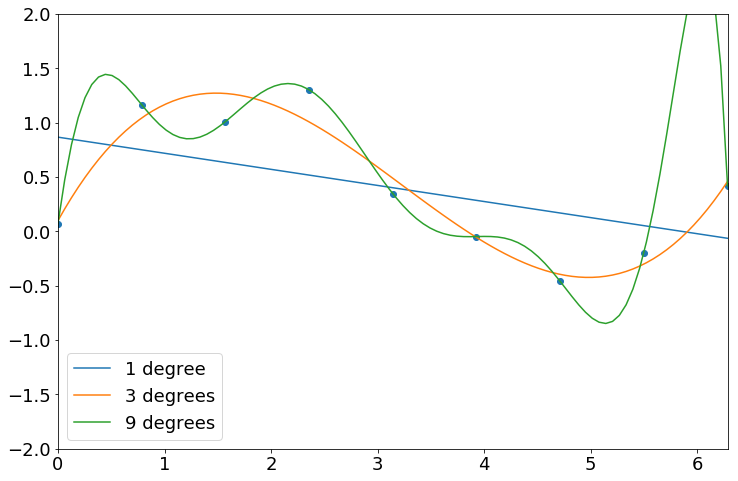

In [40]:
# 正則化なし

plt.rcParams["font.size"] = 18
plt.figure(figsize=(12,8))
plt.ylim(-2,2)
plt.xlim(0,2*np.pi)
plt.scatter(train_x,train_y)

plot_x = np.linspace(0,2*np.pi,100).reshape(-1,1)
for i,name in zip((1,3,9),("1 degree","3 degrees","9 degrees")):
  print("# {} th degree".format(i))
  # 予測モデルを作成
  model = Pipeline([('poly', PolynomialFeatures(degree=i)),
                    ('linear', LinearRegression(fit_intercept=False))])
  # fit to an order-3 polynomial data
  model = model.fit(train_x, train_y)
  print("coefficient : ",model.named_steps['linear'].coef_)
  plt.plot(plot_x,model.predict(plot_x),label=name)

plt.legend()
plt.show()


# 1 th degree
coefficient :  [[ 0.62321347 -0.09264774]]
# 3 th degree
coefficient :  [[ 0.44696602  0.68116247 -0.33535973  0.035173  ]]
# 9 th degree
coefficient :  [[ 2.60570973e-01  3.21812650e-01  2.06363419e-01  8.78752167e-02
  -3.15305137e-02 -7.97784155e-02  4.35759971e-02 -8.86779116e-03
   8.11679129e-04 -2.79094784e-05]]


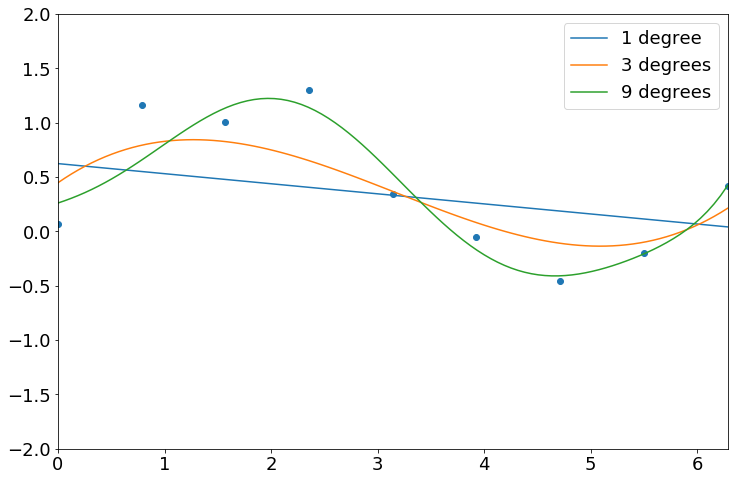

In [52]:
#L2正則化　（Ridge回帰）

plt.rcParams["font.size"] = 18
plt.figure(figsize=(12,8))
plt.ylim(-2,2)
plt.xlim(0,2*np.pi)
plt.scatter(train_x,train_y)

plot_x = np.linspace(0,2*np.pi,100).reshape(-1,1)
for i,name in zip((1,3,9),("1 degree","3 degrees","9 degrees")):
  print("# {} th degree".format(i))
  # 予測モデルを作成
  model = Pipeline([('poly', PolynomialFeatures(degree=i)),
                    ('linear', Ridge(alpha=1,fit_intercept=False))])
  # fit to an order-3 polynomial data
  model = model.fit(train_x, train_y)
  print("coefficient : ",model.named_steps['linear'].coef_)
  plt.plot(plot_x,model.predict(plot_x),label=name)
plt.legend()
plt.show()



# 9 th degree
coefficient :  [[ 2.60570973e-01  3.21812650e-01  2.06363419e-01  8.78752167e-02
  -3.15305137e-02 -7.97784155e-02  4.35759971e-02 -8.86779116e-03
   8.11679129e-04 -2.79094784e-05]]


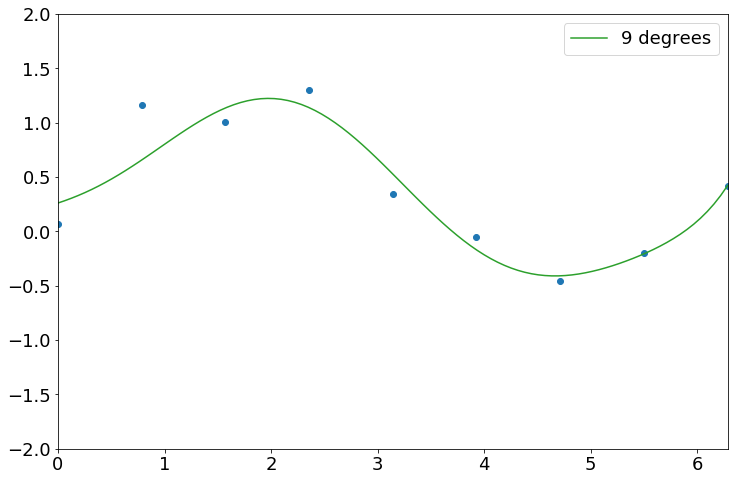

In [51]:
#L2正則化　（Ridge回帰）　9次関数のみ

cmap = plt.get_cmap("tab10") # ココがポイント

plt.rcParams["font.size"] = 18
plt.figure(figsize=(12,8))
plt.ylim(-2,2)
plt.xlim(0,2*np.pi)
plt.scatter(train_x,train_y)
for (i,name) in  zip([9],["9 degrees"]):
  print("# {} th degree".format(i))
  # 予測モデルを作成
  model = Pipeline([('poly', PolynomialFeatures(degree=i)),
                    ('linear', Ridge(alpha=1,fit_intercept=False))])
  # fit to an order-3 polynomial data
  model = model.fit(train_x, train_y)
  print("coefficient : ",model.named_steps['linear'].coef_)
  plt.plot(plot_x,model.predict(plot_x),label=name,color=cmap(2))
plt.legend()
plt.show()
